# Get Data from fashion_mnist dataset

In [1]:
# Import necessary libraries
import tensorflow as tf
from keras import datasets, models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load fashion_mnist dataset from tensorflow into a train and test dictionaries
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

train_emander = {'images': x_train, 'labels': y_train}
test_emander = {'images': x_test, 'labels': y_test}

# Initial Exploration

In [3]:
print(f"Training Size: {len(train_emander['images'])}")
print(f"Testing Size: {len(test_emander['images'])}")
print(f"Image Resolution: {train_emander['images'][0].shape}")

combined_images = np.concatenate((train_emander['images'], test_emander['images']), axis=0) 
largest_px_value = np.amax(combined_images)
print(f"Largest Pixel Value: {largest_px_value}")

Training Size: 60000
Testing Size: 10000
Image Resolution: (28, 28)
Largest Pixel Value: 255


# Data Pre-processing

In [4]:
# Normalize the pixel values to range of 0-1
train_emander['images'] = train_emander['images'] / largest_px_value
test_emander['images'] = test_emander['images'] / largest_px_value

In [5]:
# One-hot encode the labels
train_emander['labels'] = tf.keras.utils.to_categorical(train_emander['labels'], num_classes=10)
test_emander['labels'] = tf.keras.utils.to_categorical(test_emander['labels'], num_classes=10)

In [6]:
print(f"Training Data: {train_emander['labels'].shape}")
print(f"Testing Data: {test_emander['labels'].shape}")

Training Data: (60000, 10)
Testing Data: (10000, 10)


# Visualization

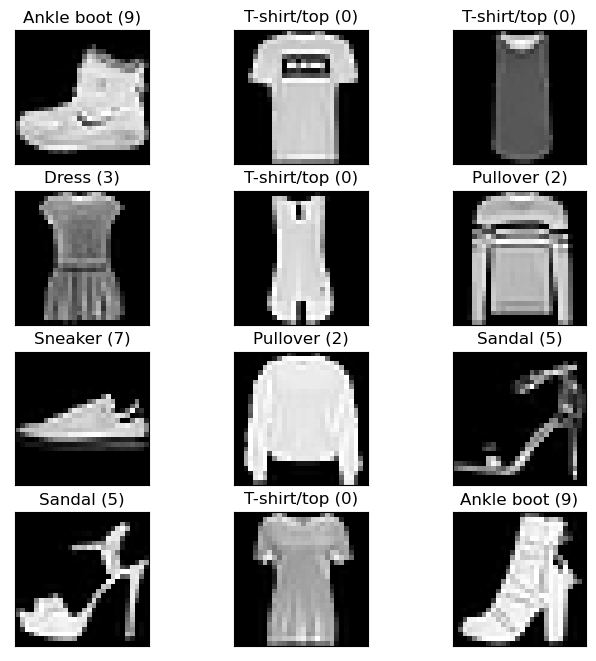

In [7]:
# Define the true descriptive labels
descriptive_label = {
    0: "T-shirt/top", 
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Create the display function
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"{descriptive_label[label]} ({label})")
    plt.xticks([])
    plt.yticks([])

# Set up the figure for displaying images
plt.figure(figsize=(8, 8))

# Display the first 12 images
for i in range(12):
    true_label = np.argmax(train_emander['labels'][i]) # Used argmax to get the index of the one-hot encoded labels
    plt.subplot(4, 3, i + 1)  # Position the image in the subplot grid
    display_image(train_emander['images'][i], true_label)
    
# Show the plot
plt.show()

# Training Data Preparation

In [9]:
x_train_emander, x_val_emander, y_train_emander, y_val_emander = train_test_split(train_emander['images'], train_emander['labels'], test_size=.2, random_state=13)

# CNN Model: Build, Train, and Validate

In [10]:
# Build CNN model
cnn_model_emander = models.Sequential([
    # Input layer: 28 x 28
    layers.InputLayer(input_shape=(28, 28, 1)),
    # First Convolutional Layer
    # Output Shape = ((input - kernel)/Stride) + 1 
    #              = ((28-3)/1) + 1 
    #              = 26, 26, 32(filter)
    # Param # = # of filters * (kernel height * kernel width * input channels) + # of filters(bias)
    #              = 32 * (3 * 3 * 1) + 32
    #              = 320
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # First Max Pooling Layer = half of the output shape (26, 26, 32) = (13, 13, 32)
    layers.MaxPool2D(pool_size=(2, 2)),
    # Second Convolutional Layer
    # Output Shape = ((13-3)/1) + 1 = (11, 11, 32)
    # Param # = 32 * (3 * 3 * 32) + 32 = 9248
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    # Second Max Pooling Layer = (5, 5, 32)
    layers.MaxPool2D(pool_size=(2, 2)),
    # Flatten Layer = (5 * 5 * 32) = 800
    layers.Flatten(),
    # Fully Connected Layer
    # Output Shape = 100
    # Param # = input feature * neurons + neurons
    #         = 800 * 100 + 100
    #         = 80100
    layers.Dense(100),
    # Output Layer
    # Output Shape = 10
    # Param # = input feature * neurons + neurons
    #         = 100 * 10 + 10
    #         = 1010
    layers.Dense(10, activation='softmax')
    ])

In [11]:
# Compile the CNN model
cnn_model_emander.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Summary of the model
cnn_model_emander.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

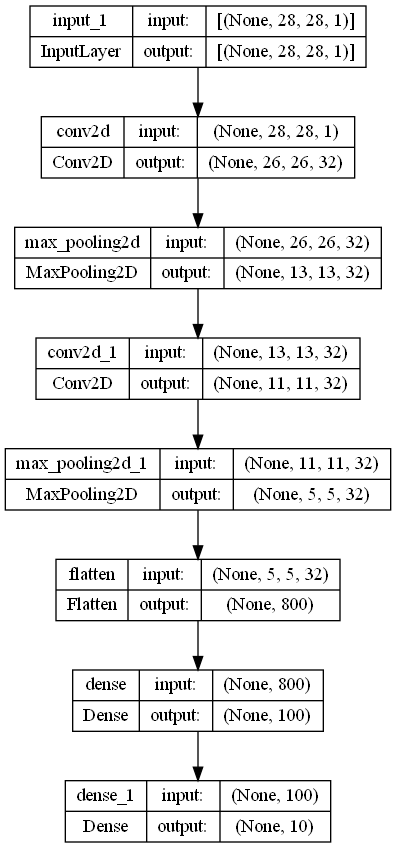

In [13]:
# Diagram for the summary
from keras.utils import plot_model
plot_model(cnn_model_emander, show_shapes=True, show_layer_names=True)

In [14]:
# Train and validate the cnn model with 8 epochs
cnn_history_emander = cnn_model_emander.fit(x_train_emander, 
                                            y_train_emander, 
                                            epochs=8,
                                            batch_size=256,
                                            validation_data=(x_val_emander, y_val_emander))

Epoch 1/8
188/188 [==============================] - 8s 36ms/step - loss: 0.6918 - accuracy: 0.7566 - val_loss: 0.4651 - val_accuracy: 0.8372
Epoch 2/8
188/188 [==============================] - 6s 34ms/step - loss: 0.4223 - accuracy: 0.8483 - val_loss: 0.4055 - val_accuracy: 0.8589
Epoch 3/8
188/188 [==============================] - 6s 34ms/step - loss: 0.3679 - accuracy: 0.8684 - val_loss: 0.3660 - val_accuracy: 0.8719
Epoch 4/8
188/188 [==============================] - 6s 33ms/step - loss: 0.3400 - accuracy: 0.8790 - val_loss: 0.3528 - val_accuracy: 0.8729
Epoch 5/8
188/188 [==============================] - 6s 34ms/step - loss: 0.3221 - accuracy: 0.8853 - val_loss: 0.3471 - val_accuracy: 0.8782
Epoch 6/8
188/188 [==============================] - 6s 34ms/step - loss: 0.3048 - accuracy: 0.8901 - val_loss: 0.3793 - val_accuracy: 0.8646
Epoch 7/8
188/188 [==============================] - 7s 35ms/step - loss: 0.2959 - accuracy: 0.8923 - val_loss: 0.3199 - val_accuracy: 0.8861
Epoch 

# CNN Model: Test and analyze

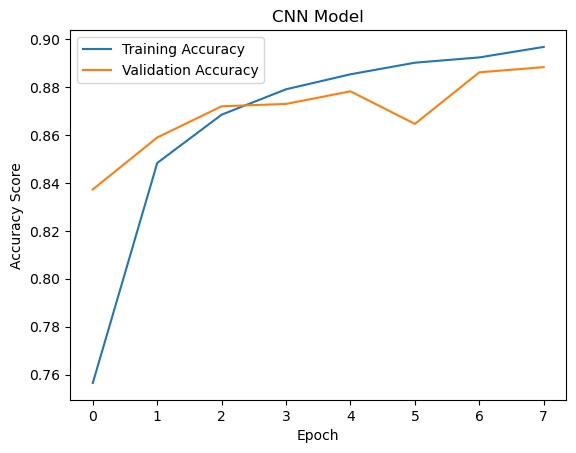

In [15]:
# Display the training vs validation accuracy
plt.plot(cnn_history_emander.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_emander.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.title('CNN Model')
plt.legend()
plt.show()

In [16]:
# Evaluate the model
cnn_test_loss, cnn_test_accuracy = cnn_model_emander.evaluate(test_emander['images'], test_emander['labels'])
cnn_val_loss, cnn_val_accuracy = cnn_model_emander.evaluate(x_val_emander, y_val_emander)

print(f"Test Loss: {cnn_test_loss}")
print(f"Val Loss: {cnn_val_loss}")
print(f"Test Accuracy: {cnn_test_accuracy}")
print(f"Val Accuracy: {cnn_val_accuracy}")

375/375 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8882
Test Loss: 0.3198712170124054
Val Loss: 0.3098379075527191
Test Accuracy: 0.8858000040054321
Val Accuracy: 0.8882499933242798


In [17]:
# Create predictions on the test dataset
cnn_predictions_emander = cnn_model_emander.predict(test_emander['images'])

313/313 [==============================] - 1s 3ms/step


In [33]:
# A function that plots the probability distrubution
def display_prob_dist(t_label, probabilities):
    p_label = np.argmax(probabilities)
    
    for i, value in enumerate(probabilities):
        if(i == p_label):
            plt.bar(i, value, color='blue')
        elif(i == t_label):
            plt.bar(i, value, color='green')
        else:
            plt.bar(i, value, color='gray')
            
    plt.yticks([])
    plt.xticks(range(0,10,1))

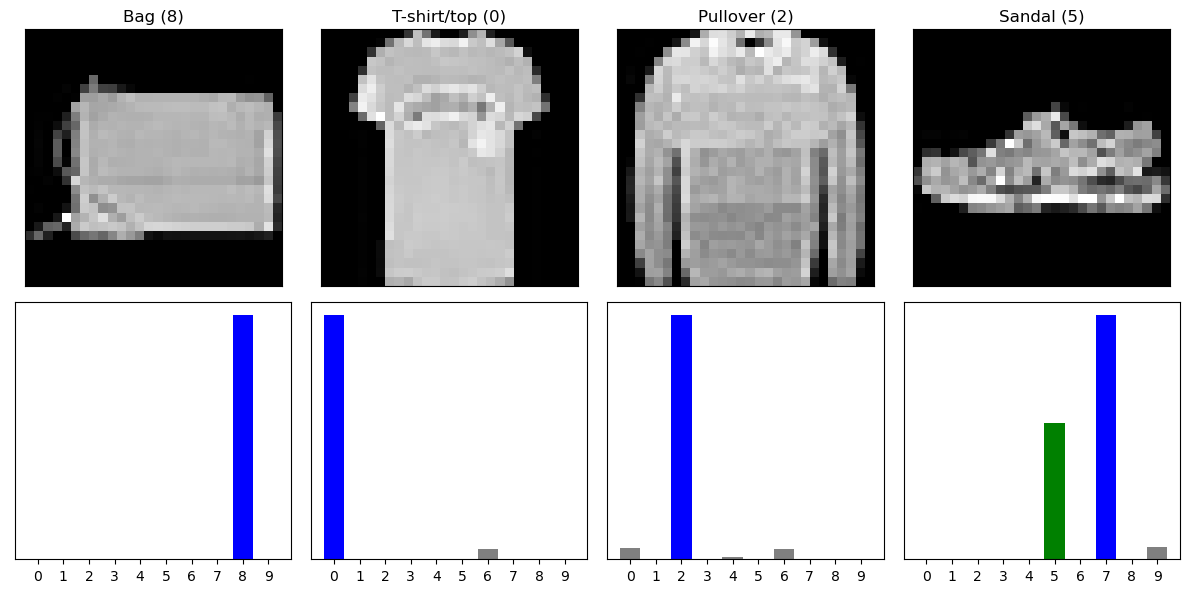

In [34]:
# Visualization
plt.figure(figsize=(12, 6))

for i in range(4):
    index = i + 18
    true_label = np.argmax(test_emander['labels'][index]) # Using argmax to get the index of the one-hot encoded labels
    prediction = cnn_predictions_emander[index]
    
    plt.subplot(2, 4, i + 1)  # Position the image in the subplot grid
    display_image(test_emander['images'][index], true_label)
    
    plt.subplot(2, 4, i + 5)
    display_prob_dist(true_label, prediction)

plt.tight_layout()
plt.show()

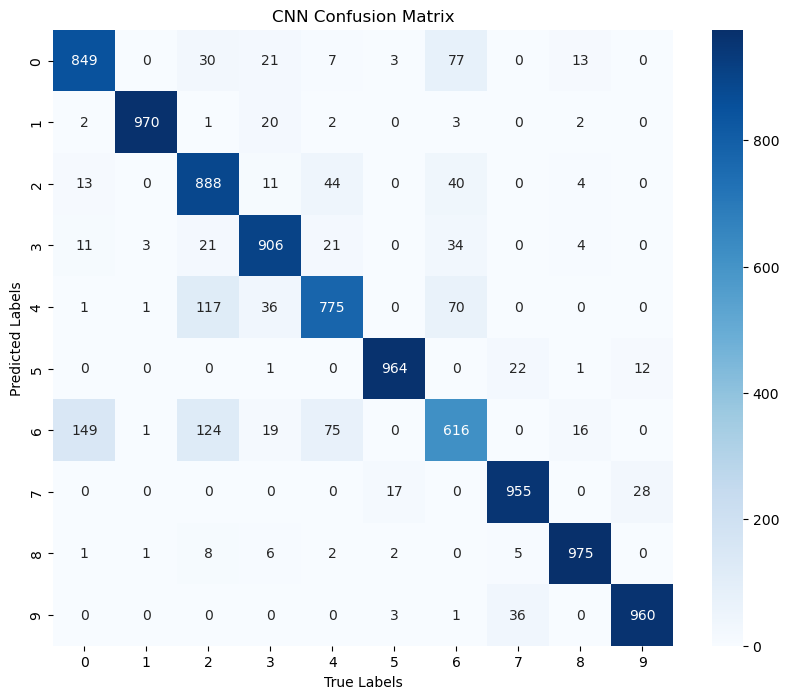

In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnn_cm = confusion_matrix(np.argmax(test_emander['labels'], axis=1), np.argmax(cnn_predictions_emander, axis=1))

# Plot the confusion matrix using Seaborn's heatmap()
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()

# RNN MODEL: Build, Train, and Validate

In [21]:
# Build RNN model
rnn_model_emander = models.Sequential([
    layers.LSTM(128, input_shape=(28, 28), return_sequences=False),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

In [22]:
# Compile the RNN model
rnn_model_emander.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Summary of RNN model
rnn_model_emander.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 89290 (348.79 KB)
Trainable params: 89290 (348.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


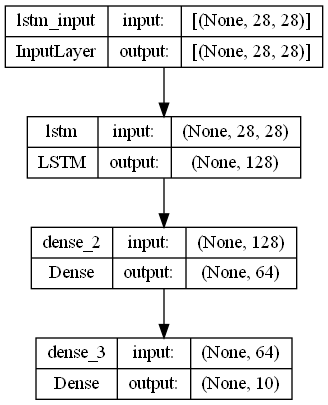

In [24]:
# Diagram for the RNN summary
plot_model(rnn_model_emander, show_shapes=True, show_layer_names=True)

In [25]:
# Train and validate the cnn model with 8 epochs
rnn_history_emander = rnn_model_emander.fit(x_train_emander, 
                                            y_train_emander, 
                                            epochs=8,
                                            batch_size=256,
                                            validation_data=(x_val_emander, y_val_emander))

Epoch 1/8
188/188 [==============================] - 10s 44ms/step - loss: 0.8243 - accuracy: 0.6976 - val_loss: 0.5452 - val_accuracy: 0.8018
Epoch 2/8
188/188 [==============================] - 8s 44ms/step - loss: 0.4938 - accuracy: 0.8178 - val_loss: 0.4770 - val_accuracy: 0.8253
Epoch 3/8
188/188 [==============================] - 9s 46ms/step - loss: 0.4347 - accuracy: 0.8403 - val_loss: 0.4338 - val_accuracy: 0.8421
Epoch 4/8
188/188 [==============================] - 8s 44ms/step - loss: 0.4076 - accuracy: 0.8492 - val_loss: 0.4054 - val_accuracy: 0.8493
Epoch 5/8
188/188 [==============================] - 8s 43ms/step - loss: 0.3799 - accuracy: 0.8591 - val_loss: 0.3921 - val_accuracy: 0.8543
Epoch 6/8
188/188 [==============================] - 8s 44ms/step - loss: 0.3632 - accuracy: 0.8637 - val_loss: 0.3780 - val_accuracy: 0.8616
Epoch 7/8
188/188 [==============================] - 8s 42ms/step - loss: 0.3473 - accuracy: 0.8710 - val_loss: 0.3549 - val_accuracy: 0.8718
Epoch

# RNN Model: Test and analyze

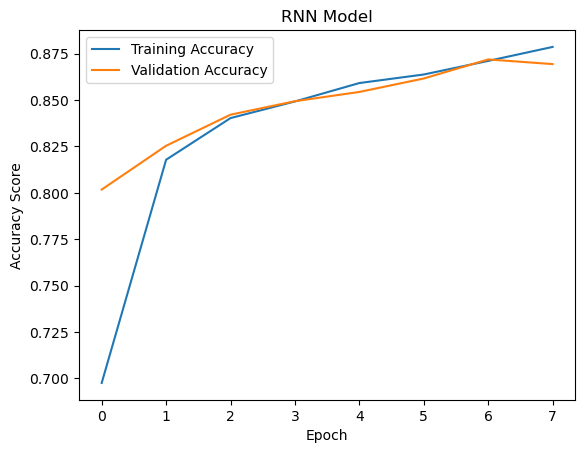

In [26]:
# Display the training vs validation accuracy
plt.plot(rnn_history_emander.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_emander.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.title('RNN Model')
plt.legend()
plt.show()

In [27]:
# Evaluate the model
rnn_test_loss, rnn_test_accuracy = rnn_model_emander.evaluate(test_emander['images'], test_emander['labels'])
rnn_val_loss, rnn_val_accuracy = rnn_model_emander.evaluate(x_val_emander, y_val_emander)

print(f"Test Loss: {rnn_test_loss}")
print(f"Val Loss: {rnn_val_loss}")
print(f"Test Accuracy: {rnn_test_accuracy}")
print(f"Val Accuracy: {rnn_val_accuracy}")

375/375 [==============================] - 2s 6ms/step - loss: 0.3529 - accuracy: 0.8693
Test Loss: 0.36619994044303894
Val Loss: 0.3529055714607239
Test Accuracy: 0.8661999702453613
Val Accuracy: 0.8693333268165588


In [28]:
# Create predictions on the test dataset
rnn_predictions_emander = rnn_model_emander.predict(test_emander['images'])

313/313 [==============================] - 2s 6ms/step


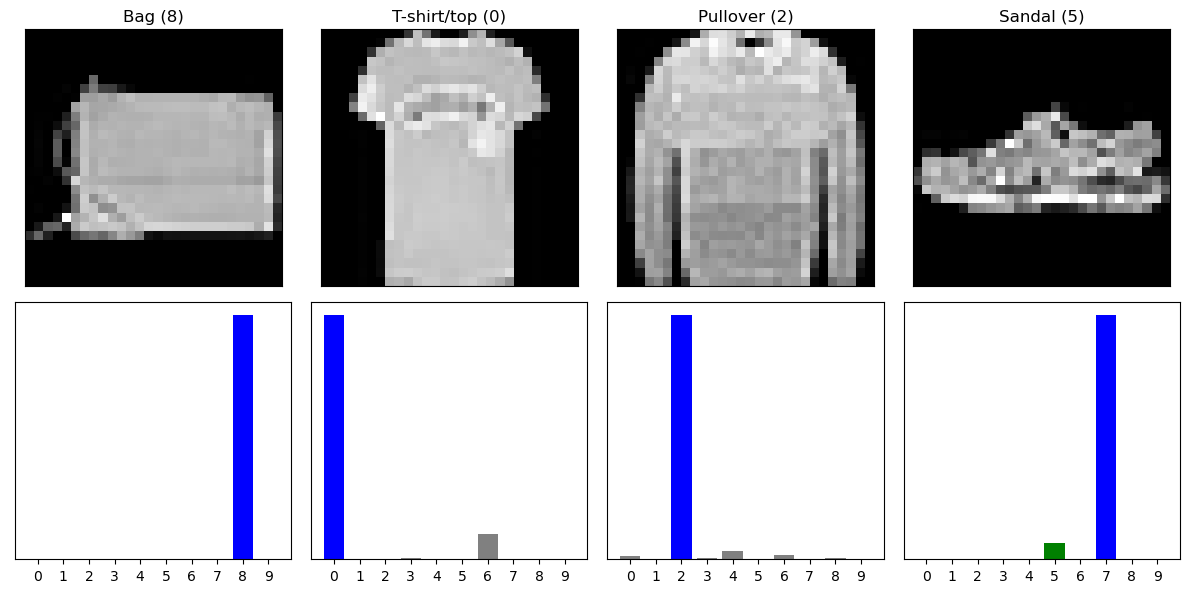

In [39]:
# Visualization
plt.figure(figsize=(12, 6))

for i in range(4):
    index = i + 18
    true_label = np.argmax(test_emander['labels'][index]) # Using argmax to get the index of the one-hot encoded labels
    prediction = rnn_predictions_emander[index]
    
    plt.subplot(2, 4, i + 1)  # Position the image in the subplot grid
    display_image(test_emander['images'][index], true_label)
    
    plt.subplot(2, 4, i + 5)
    display_prob_dist(true_label, prediction)

plt.tight_layout()
plt.show()

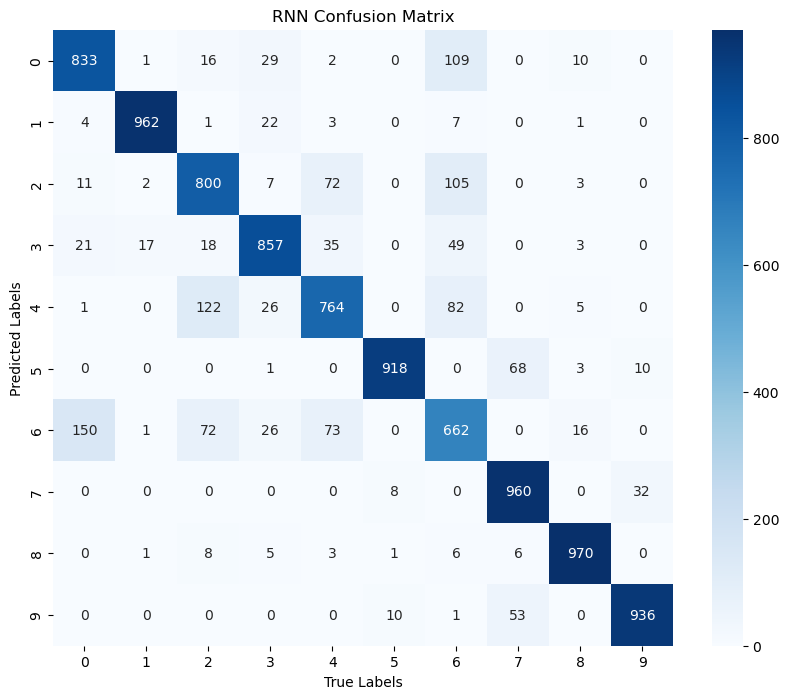

In [38]:
# RNN Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
rnn_cm = confusion_matrix(np.argmax(test_emander['labels'], axis=1), np.argmax(rnn_predictions_emander, axis=1))

# Plot the confusion matrix using Seaborn's heatmap()
plt.figure(figsize=(10, 8))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()